`Import necessary Library`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline 
##%matplotlib inline turns on “inline ploting”, where plot graphics will appear in your notebook.
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [4]:
## rows = 10841 col =13
df.shape

(10841, 13)

In [5]:
df.size

140933

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
## Check the duplicated values
df.duplicated().sum()

483

In [10]:
#drop Duplicated values
df.drop_duplicates(inplace=True) ## Return dataframe with remove duplicate rows

In [11]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [12]:
df.duplicated().sum()

0

In [13]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [14]:
## Deals with Reviews Columns

In [15]:
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [16]:
df[~df["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
## Drop row no -10472 
df.drop(10472,axis=0,inplace=True)

In [18]:
df[~df["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
# Change the data type of Reviews
df["Reviews"]=df["Reviews"].astype(int)
df["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10357, dtype: int32

In [20]:
## deal with Size column

In [21]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [22]:
df["Size"]= df["Size"].str.replace("M","000")
df["Size"]= df["Size"].str.replace("k","")
df["Size"]= df["Size"].replace("Varies with device",np.nan)

In [23]:
df.Size

0         19000
1         14000
2        8.7000
3         25000
4        2.8000
          ...  
10836     53000
10837    3.6000
10838    9.5000
10839       NaN
10840     19000
Name: Size, Length: 10357, dtype: object

In [24]:
## Change the data type of Size col
df["Size"] =df["Size"].astype(float)
df["Size"]

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10357, dtype: float64

In [25]:
df["Size"].unique()

array([1.90e+04, 1.40e+04, 8.70e+00, 2.50e+04, 2.80e+00, 5.60e+00,
       2.90e+04, 3.30e+04, 3.10e+00, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+00, 5.50e+00, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+00, 7.00e+00, 2.30e+04, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+04, 2.40e+04,      nan,
       9.40e+00, 1.50e+04, 1.00e+04, 1.20e+00, 2.60e+04, 8.00e+00,
       7.90e+00, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+04, 2.50e+00,
       1.60e+04, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+04,
       3.20e+04, 5.40e+00, 1.80e+04, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+04, 9.00e+00, 6.70e+00, 3.00e+04, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+04, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+04, 7.30e+04, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+04, 7.30e+00, 9.10e+00, 5.50e

In [26]:
## Deals with Insatalls column

In [27]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [28]:
df["Installs"] =df["Installs"].str.replace("+","")
df["Installs"] =df["Installs"].str.replace(",","")

In [29]:
# Change the data type of column
df["Installs"]=df["Installs"].astype(int)
df["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10357, dtype: int32

In [30]:
##Let deal Price column

In [31]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [32]:
df["Price"]= df["Price"].str.replace("$","")

In [33]:
## Change the datatype 
df["Price"] =df["Price"].astype(float)

In [34]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [35]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [36]:
## Lets deal Content Rating columns

In [37]:
df["Content Rating"]

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 10357, dtype: object

In [38]:
# deals with Last Updated column

In [39]:
df["Last Updated"]

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10357, dtype: object

In [40]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"])

In [41]:
df["Last Updated"]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10357, dtype: datetime64[ns]

In [42]:
df["Year"] =df["Last Updated"].dt.year
df["Month"] =df["Last Updated"].dt.month
df["Date"] =df["Last Updated"].dt.day

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          8892 non-null   float64       
 3   Reviews         10357 non-null  int32         
 4   Size            8831 non-null   float64       
 5   Installs        10357 non-null  int32         
 6   Type            10356 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10349 non-null  object        
 12  Android Ver     10355 non-null  object        
 13  Year            10357 non-null  int64         
 14  Month           10357 non-null  int64         
 15  Da

In [44]:
df.drop("Last Updated",axis=1,inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int32  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int32  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Current Ver     10349 non-null  object 
 11  Android Ver     10355 non-null  object 
 12  Year            10357 non-null  int64  
 13  Month           10357 non-null  int64  
 14  Date            10357 non-null  int64  
dtypes: float64(3), int32(2), int64(3), object(7)
memory usage: 1.2+ MB


In [46]:
df["Content Rating"].value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [47]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [48]:
df["Content Rating"]=df["Content Rating"].replace(to_replace={"Everyone 10+":"Everyone","Mature 17+":"Adults only 18+"})

In [49]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Adults only 18+', 'Unrated'], dtype=object)

In [50]:
df["Content Rating"].value_counts()

Everyone           8759
Teen               1146
Adults only 18+     450
Unrated               2
Name: Content Rating, dtype: int64

In [51]:
# Sort the numerical & Categoriacal columns

In [52]:
cat_col =[col for col in df.columns if df[col].dtypes =="O"]
num_col =[col for col in df.columns if df[col].dtypes !="O"]

In [53]:
cat_col

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [54]:
num_col

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Year', 'Month', 'Date']

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int32  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int32  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Current Ver     10349 non-null  object 
 11  Android Ver     10355 non-null  object 
 12  Year            10357 non-null  int64  
 13  Month           10357 non-null  int64  
 14  Date            10357 non-null  int64  
dtypes: float64(3), int32(2), int64(3), object(7)
memory usage: 1.2+ MB


In [56]:
df[num_col].describe()

,Rating,Reviews,Size,Installs,Price,Year,Month,Date
count,8892.000000,1.035700e+04,8831.000000,1.035700e+04,10357.000000,10357.000000,10357.000000,10357.000000
mean,4.187877,4.059046e+05,19322.130517,1.415776e+07,1.030800,2017.382929,6.397026,15.619098
std,0.522377,2.696778e+06,23997.811234,8.023955e+07,16.278625,1.112766,2.606359,9.528658
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,2010.000000,1.000000,1.000000
25%,4.000000,3.200000e+01,5.500000,1.000000e+03,0.000000,2017.000000,5.000000,6.000000
50%,4.300000,1.680000e+03,13000.000000,1.000000e+05,0.000000,2018.000000,7.000000,16.000000
75%,4.500000,4.641600e+04,29000.000000,1.000000e+06,0.000000,2018.000000,8.000000,24.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000,2018.000000,12.000000,31.000000


In [57]:
# Visualizations and Insight from Datasets
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Year', 'Month', 'Date'],
      dtype='object')

In [58]:
df_type =df["Type"].value_counts()

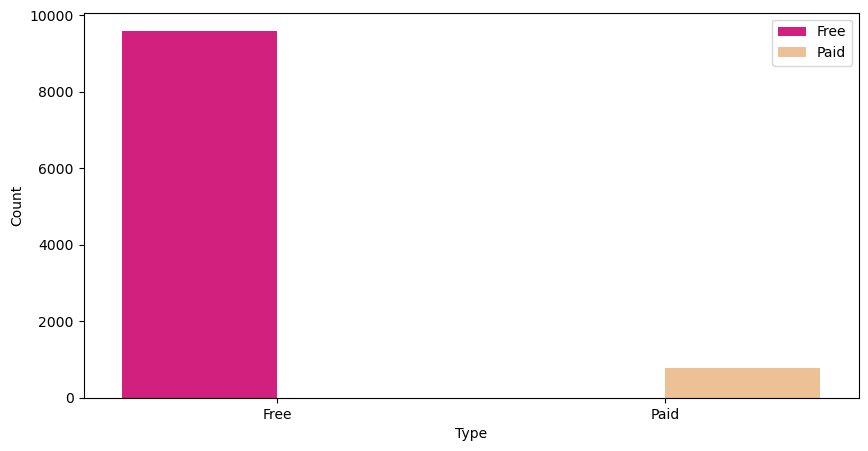

In [59]:
## Count plot of feature -Type
plt.figure(figsize=(10,5))
sns.countplot(x=df["Type"],data=df,hue="Type",palette="Accent_r")
plt.xlabel("Type")
plt.ylabel("Count")
plt.legend()
plt.show()

##### Observation And Insights-

1. Free app use more as compare to Paid 9591 count
2. Paid App less used count is 765

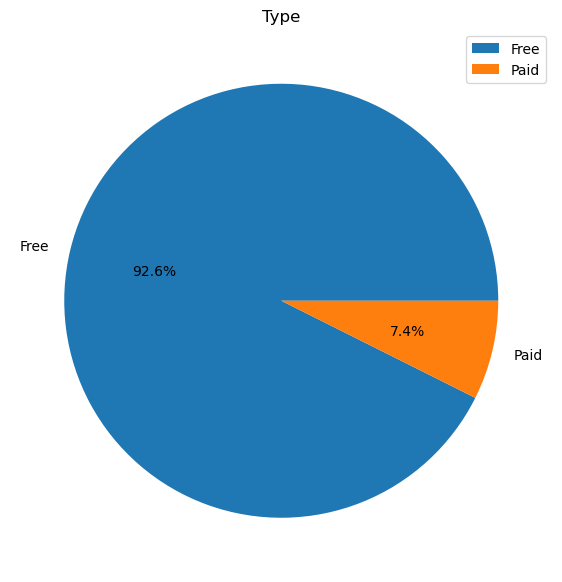

In [60]:
plt.figure(figsize=(7,8))
plt.pie(x=df_type,labels=df_type.index,autopct="%1.1f%%",)
plt.title("Type")
plt.legend()
plt.show()

##### Observation And Insights-

1. Free app used 92.6%
2. Paid App use less only 7.4%

In [61]:
## Distrubution of category
num_col

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Year', 'Month', 'Date']

<Figure size 640x480 with 0 Axes>

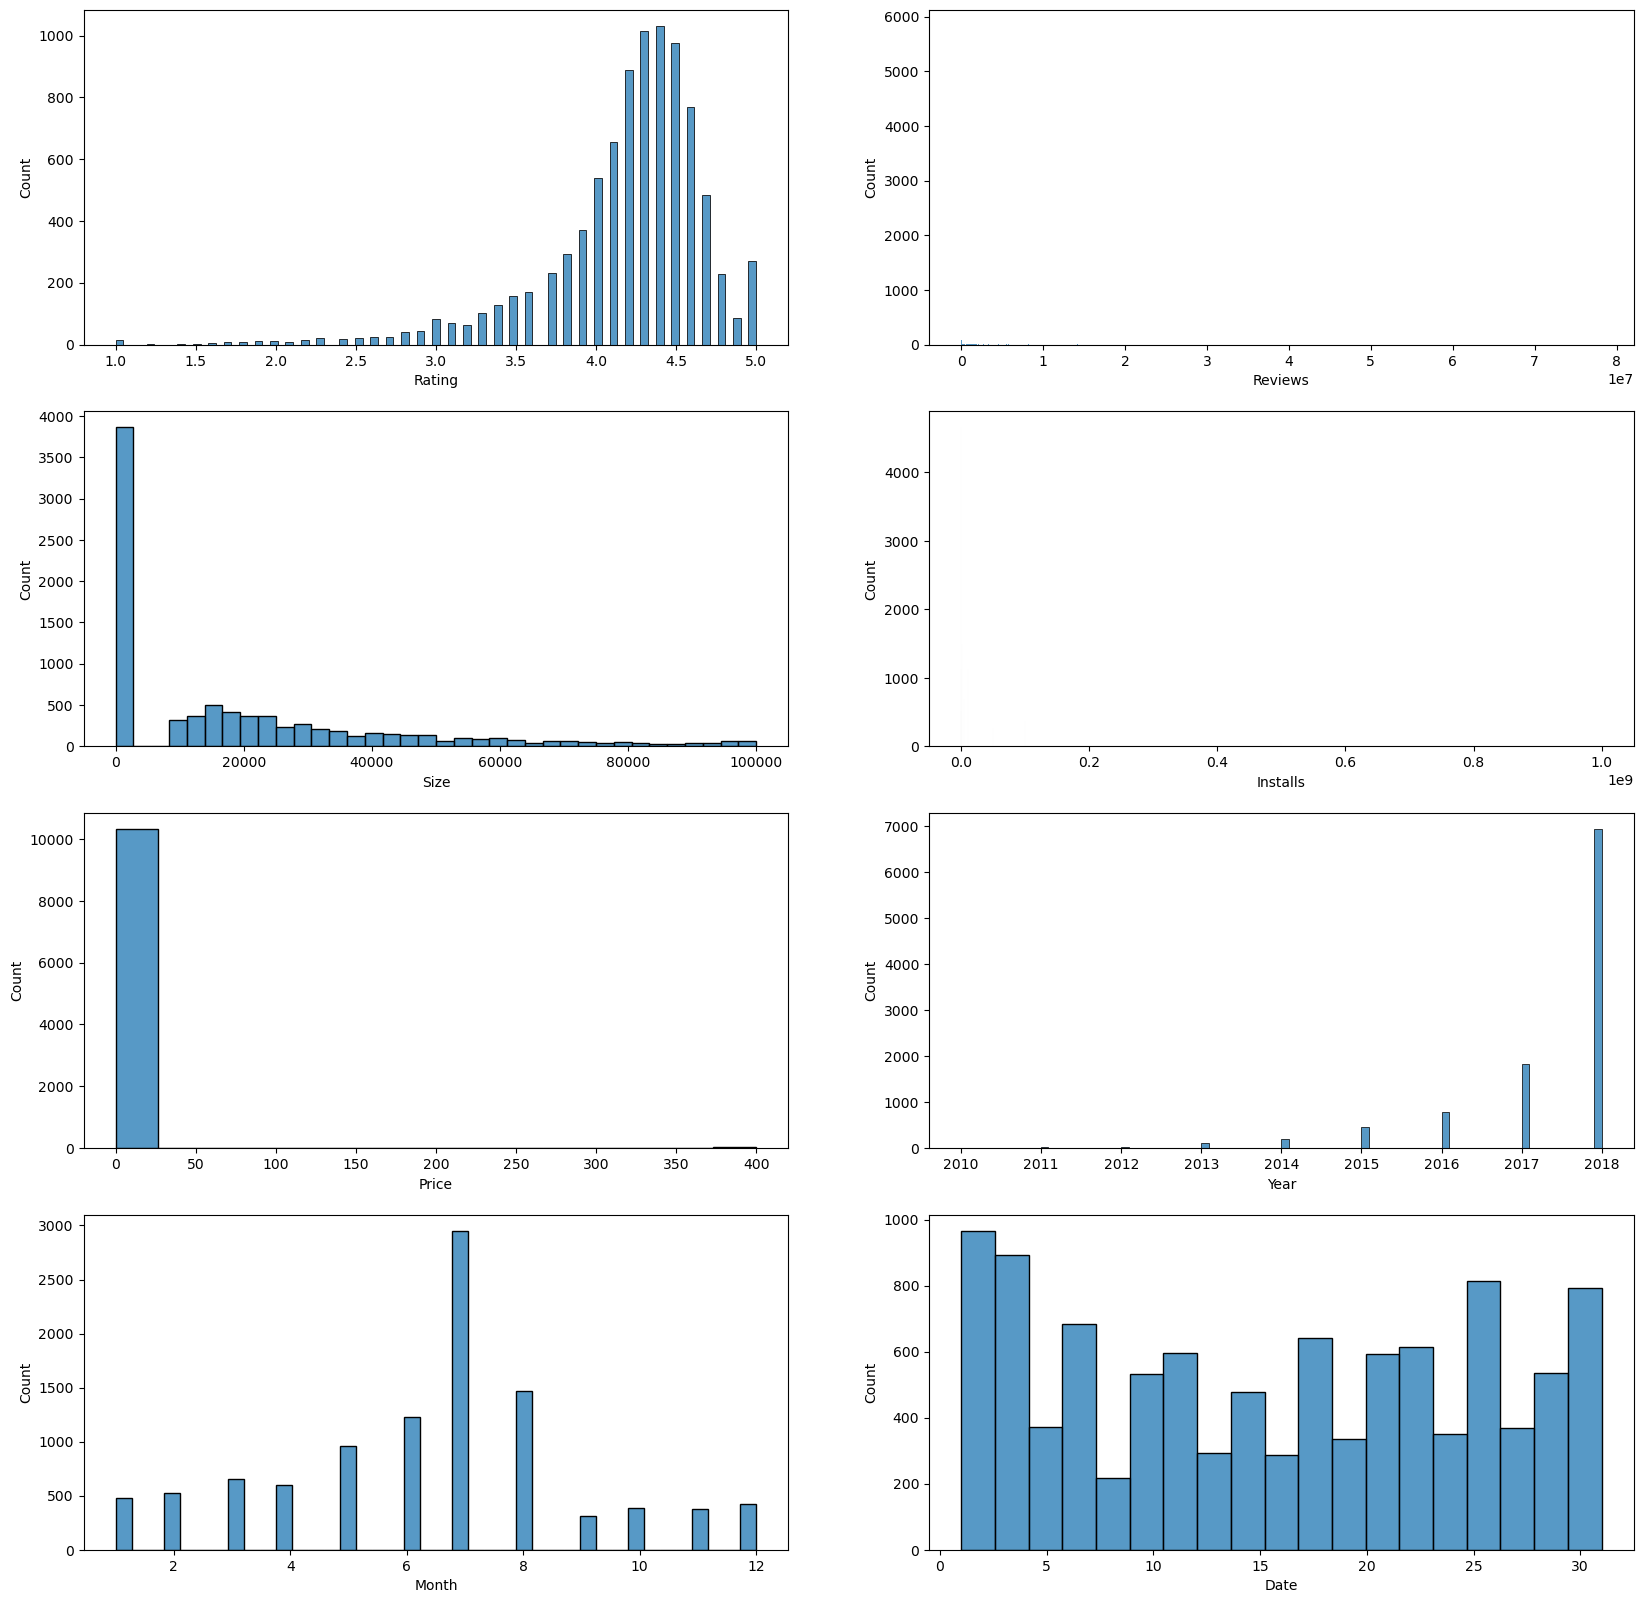

In [62]:
def histplot(col):
    plt.figure(figsize=(20,20))
    plotNum =1
    for i in col :
        if plotNum <=8 :
            
            ax =plt.subplot(4,2,plotNum,)
            sns.histplot(x=df[i])
            plt.xlabel(i)
        plotNum+=1
        
plt.tight_layout()
plt.show() 

## Driver code
histplot(num_col)   

#### Observation and Insight
1. Rating 4- 4.7 has given max number of people

<Figure size 1000x1000 with 0 Axes>

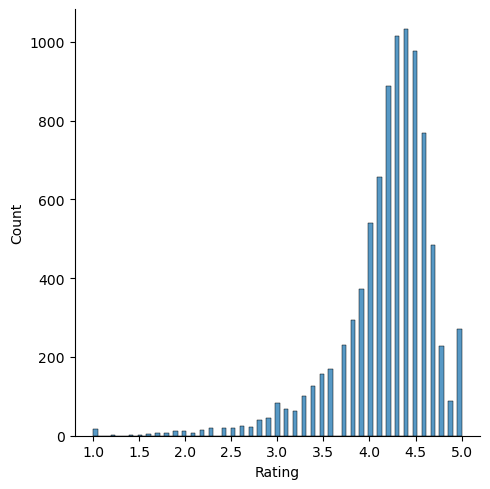

In [63]:
plt.figure(figsize=(10,10))
sns.displot(df["Rating"])
plt.show()

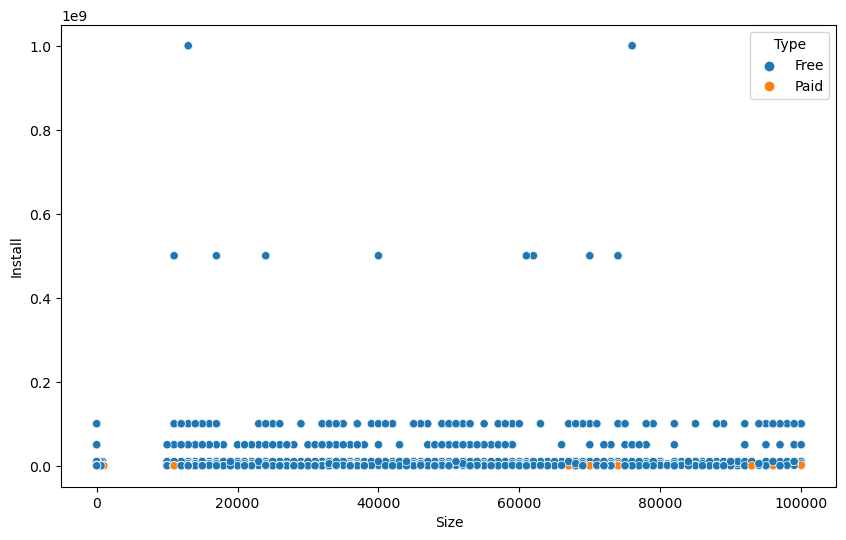

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Size"],y=df["Installs"],data=df,hue="Type")
plt.xlabel("Size")
plt.ylabel("Install")
plt.show()

In [65]:
df["Content Rating"]

0               Everyone
1               Everyone
2               Everyone
3                   Teen
4               Everyone
              ...       
10836           Everyone
10837           Everyone
10838           Everyone
10839    Adults only 18+
10840           Everyone
Name: Content Rating, Length: 10357, dtype: object

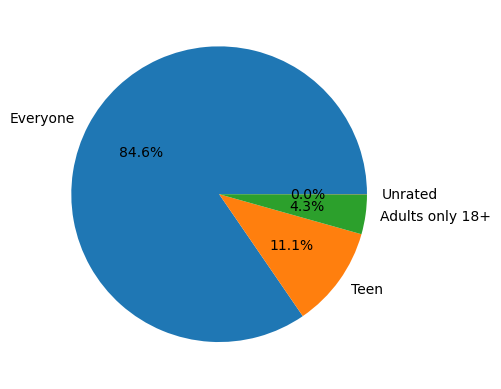

In [66]:
df_content_Rating =df["Content Rating"].value_counts()
plt.pie(x=df_content_Rating,labels =df_content_Rating.index,autopct="%1.1f%%",data=df)
plt.show()

##### Insight ===> 

1. Everyone content Rating is 84.6%
2. Teen Content Rating is 11.1%
3. Adult Rating is 4.3%
4. Unrated rating 0.0%

In [67]:
## Category wise using of apps

In [68]:
df_cat =df["Category"].value_counts()
df_cat

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

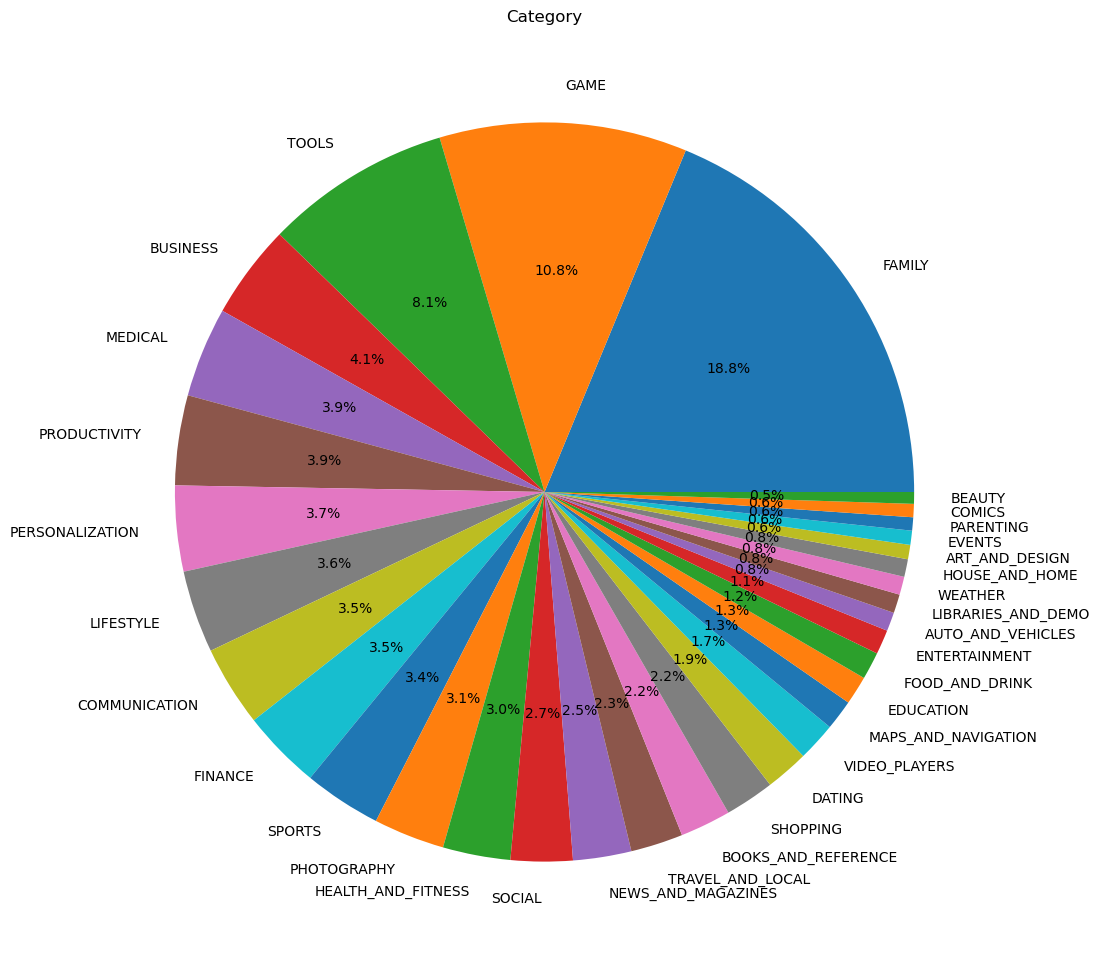

In [69]:
plt.figure(figsize=(20,12))
plt.pie(x=df_cat,labels=df_cat.index,autopct="%1.1f%%")
plt.title("Category")
plt.show()

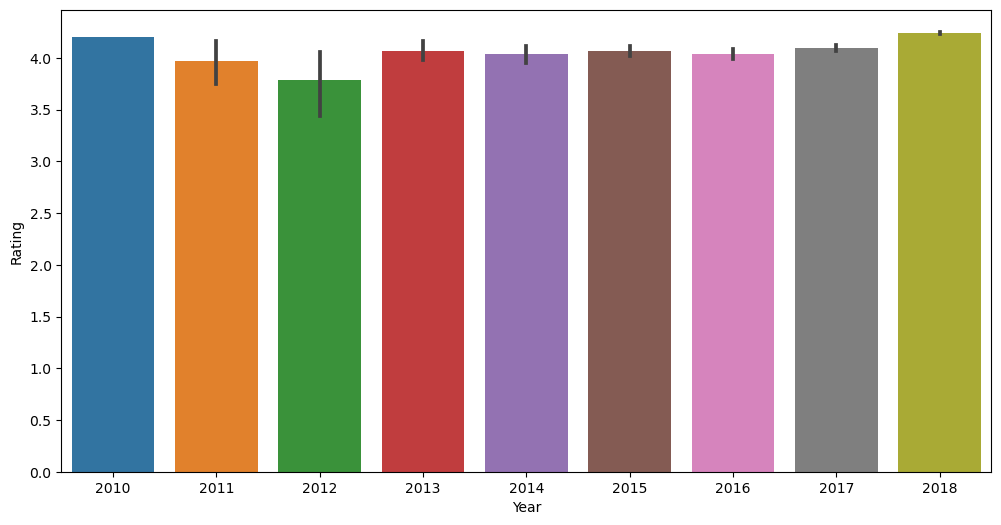

In [70]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["Year"],y=df["Rating"])
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()

#### Insights

1. highest rating given in 2010 & 2018

In [71]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Current Ver        object
Android Ver        object
Year                int64
Month               int64
Date                int64
dtype: object

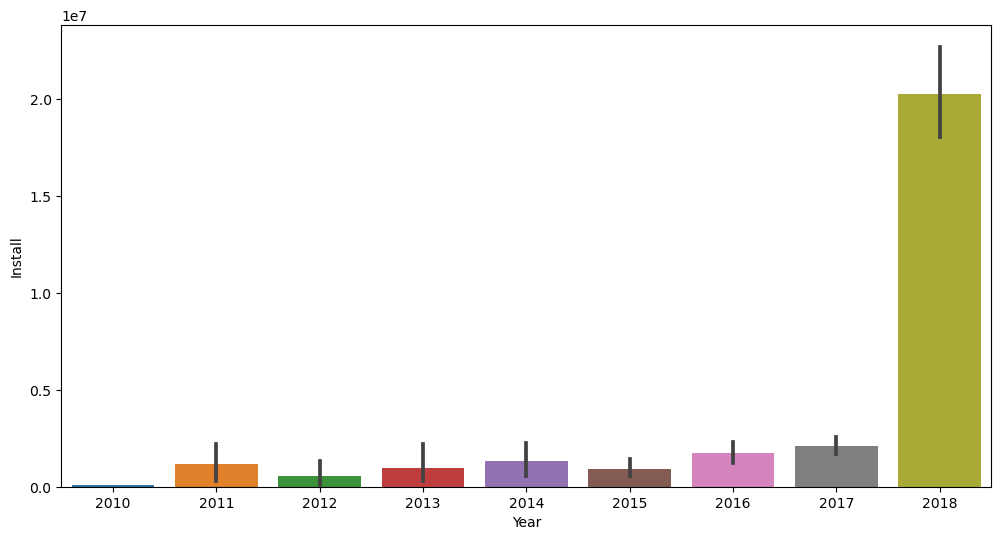

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["Year"],y=df["Installs"])


plt.xlabel("Year")
plt.ylabel("Install")
plt.show()

#### Insight = 

1. 2018 People had installed more apps 

In [73]:
type(df[num_col])

pandas.core.frame.DataFrame

In [74]:
## all Numarical relatinship in one plot


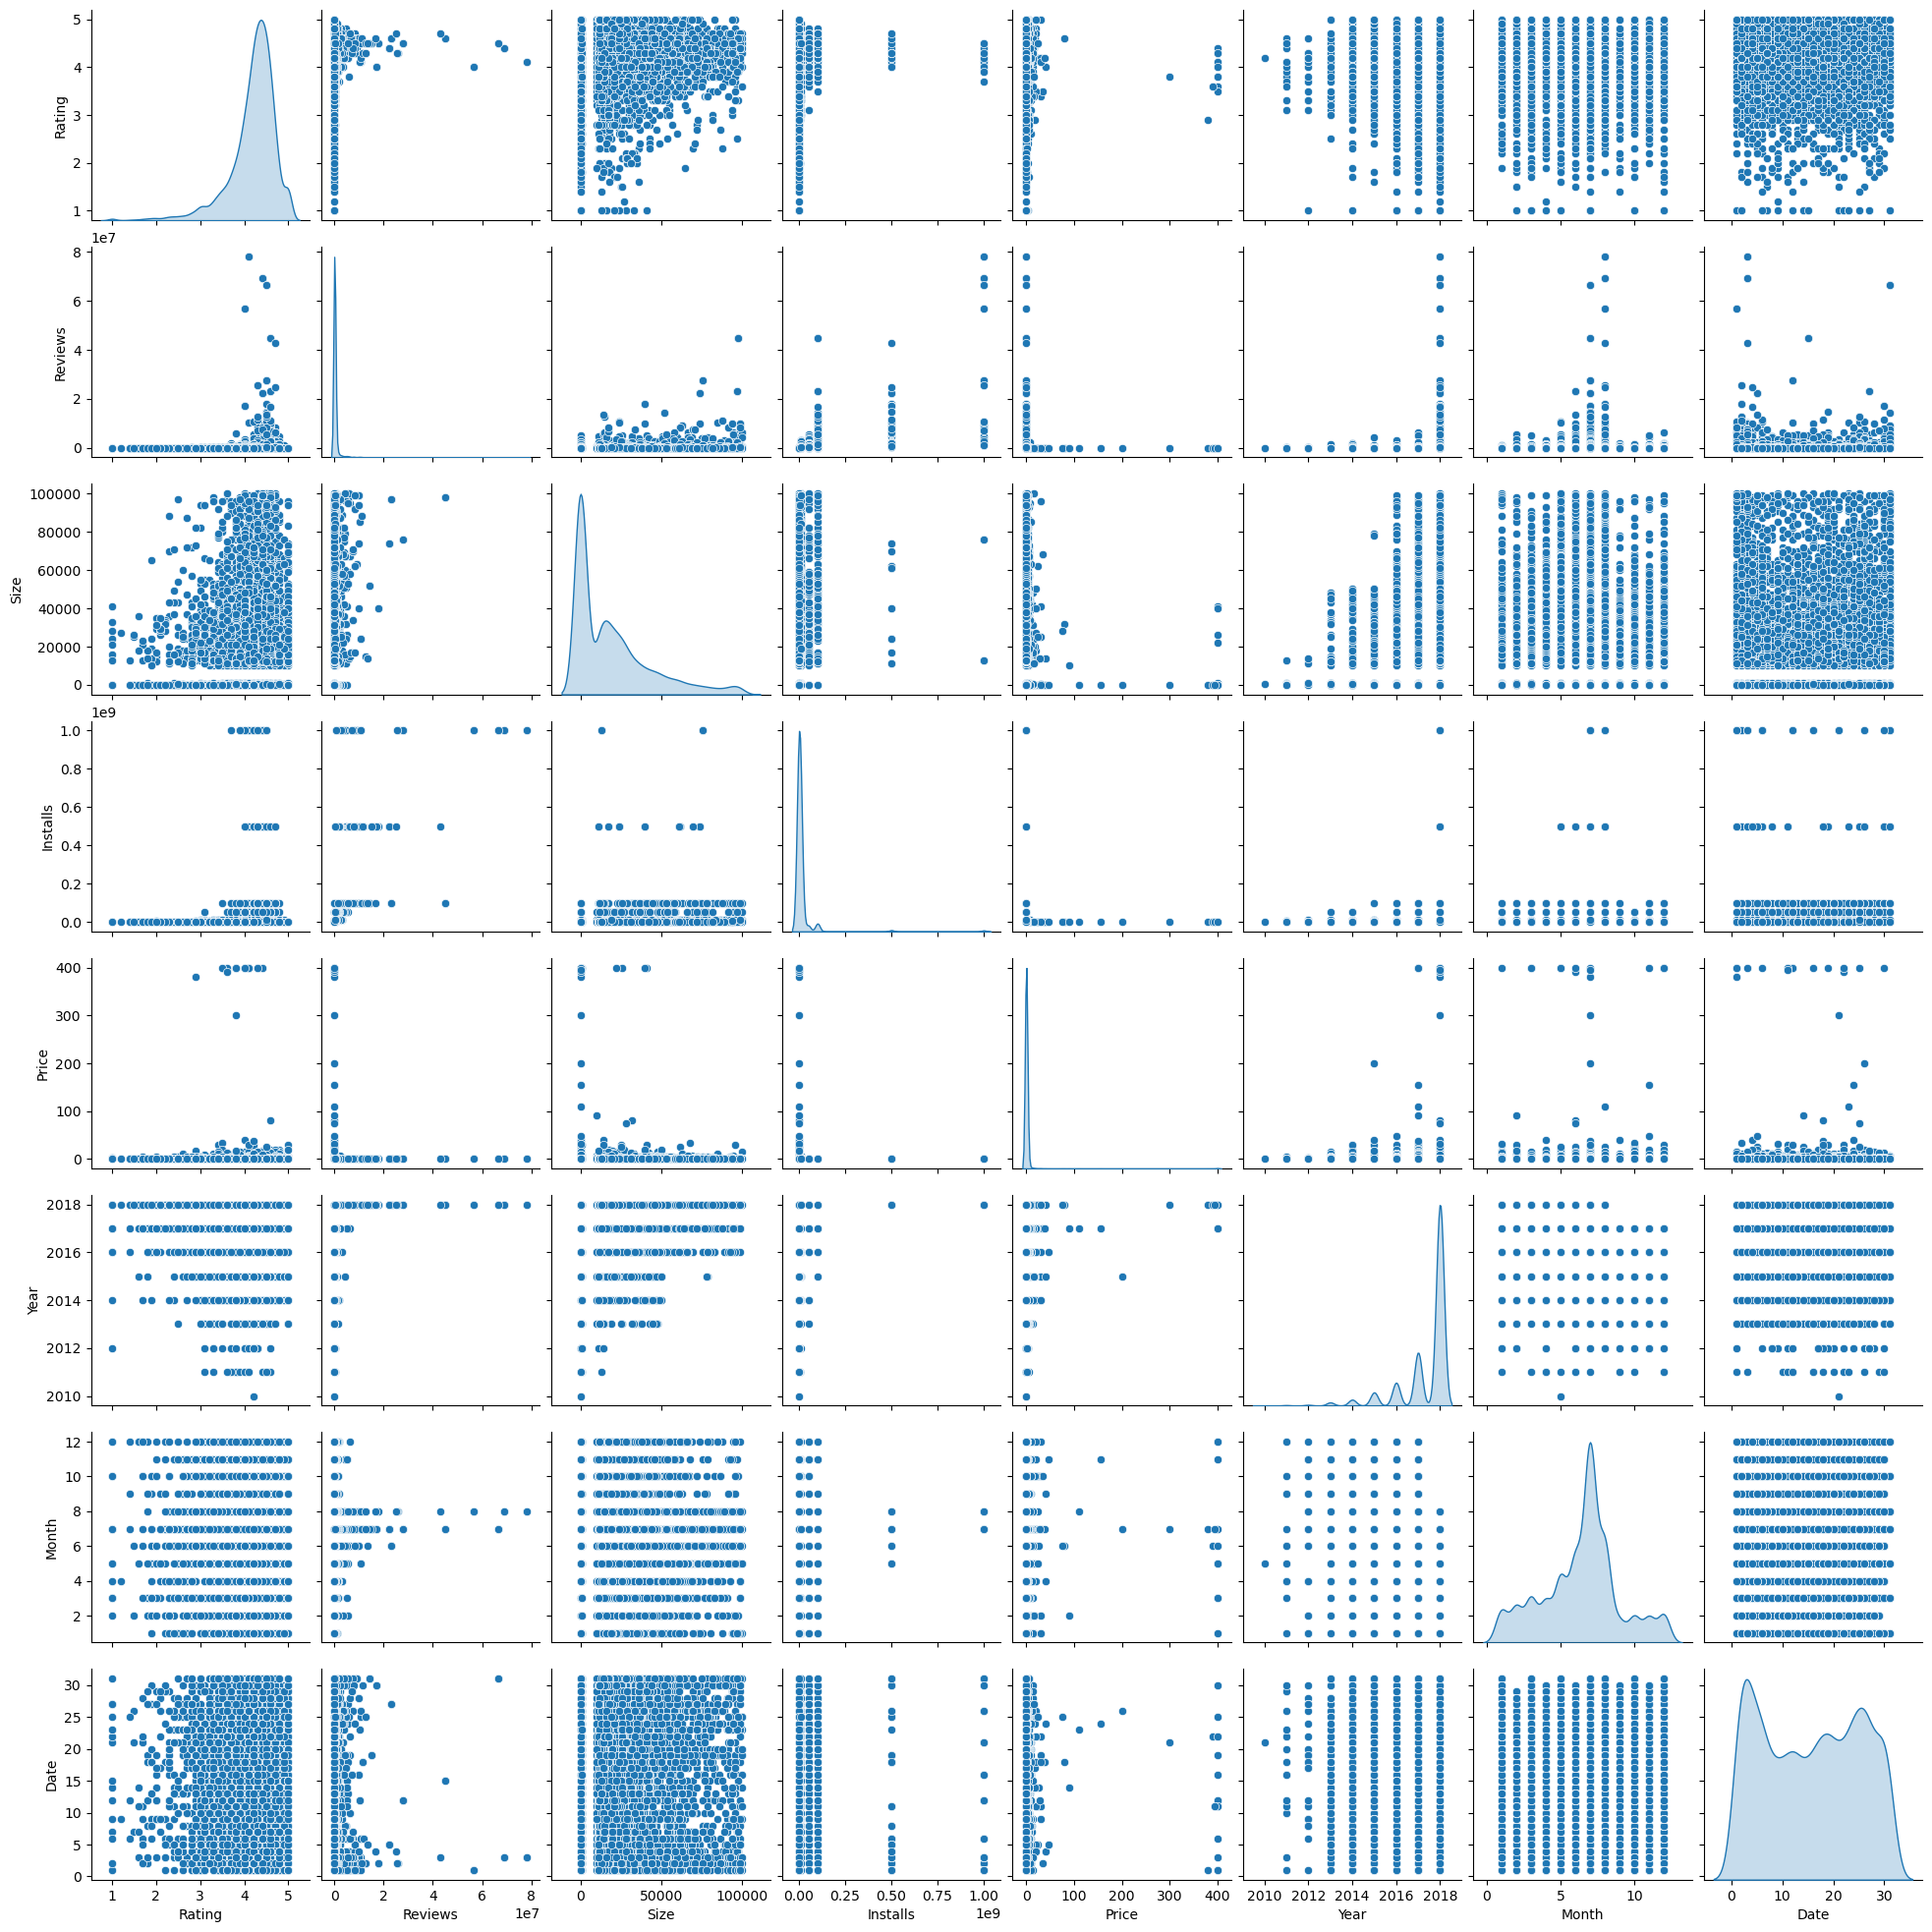

In [75]:
sns.pairplot(df[num_col],diag_kind="kde",)
plt.show()

In [76]:
# Correlation 

In [77]:
df.corr()

,Rating,Reviews,Size,Installs,Price,Year,Month,Date
Rating,1.000000,0.068732,0.080156,0.050886,-0.022355,0.136547,0.016999,-0.010102
Reviews,0.068732,1.000000,0.233572,0.634997,-0.009417,0.075744,0.044681,-0.024677
Size,0.080156,0.233572,1.000000,0.168395,-0.023526,0.206275,0.036133,-0.005558
Installs,0.050886,0.634997,0.168395,1.000000,-0.011147,0.087380,0.053847,-0.043546
Price,-0.022355,-0.009417,-0.023526,-0.011147,1.000000,-0.005627,0.006490,-0.008480
Year,0.136547,0.075744,0.206275,0.087380,-0.005627,1.000000,-0.190497,-0.015239
Month,0.016999,0.044681,0.036133,0.053847,0.006490,-0.190497,1.000000,-0.074367
Date,-0.010102,-0.024677,-0.005558,-0.043546,-0.008480,-0.015239,-0.074367,1.000000


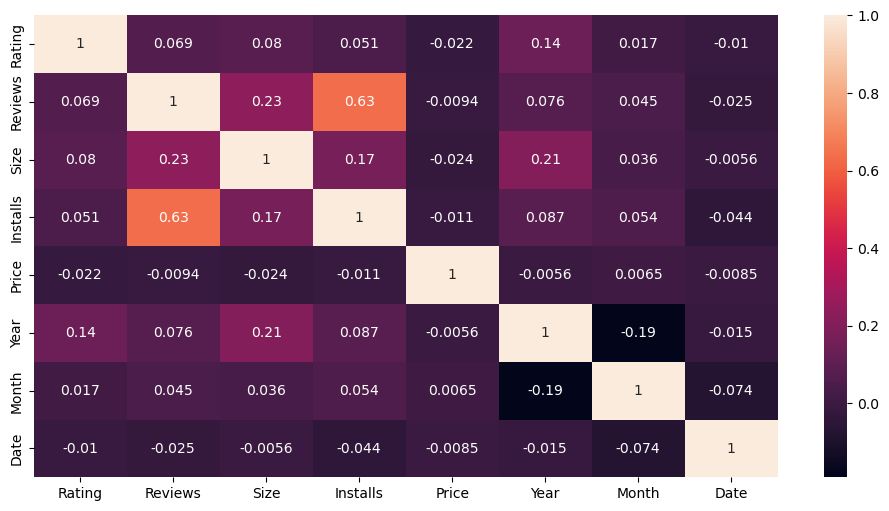

In [78]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [79]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Year', 'Month', 'Date'],
      dtype='object')

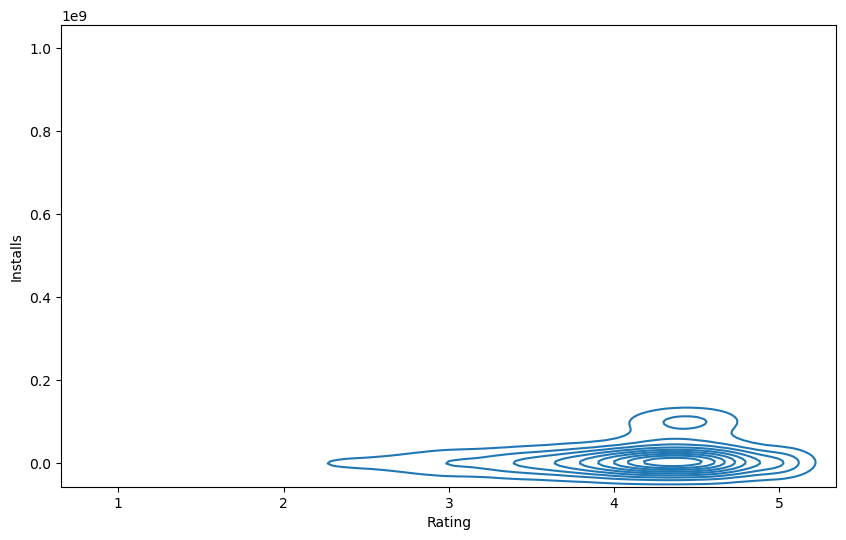

In [82]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=df["Rating"],y=df["Installs"],data=df,)
plt.show()

In [83]:
cat_col

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

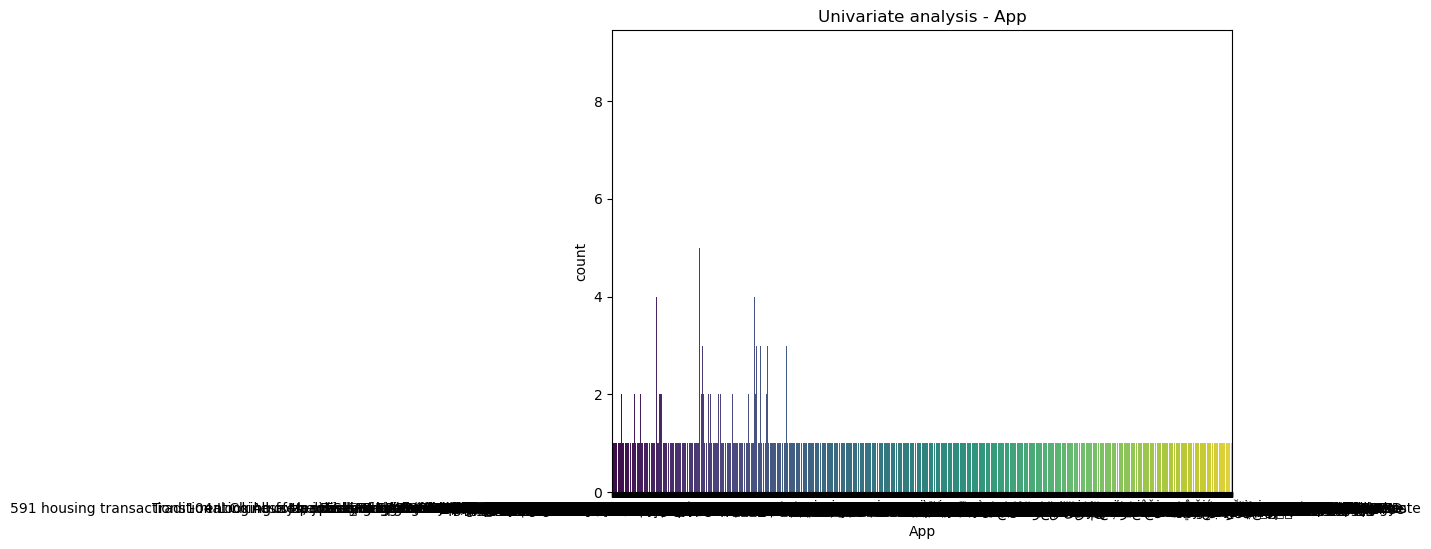

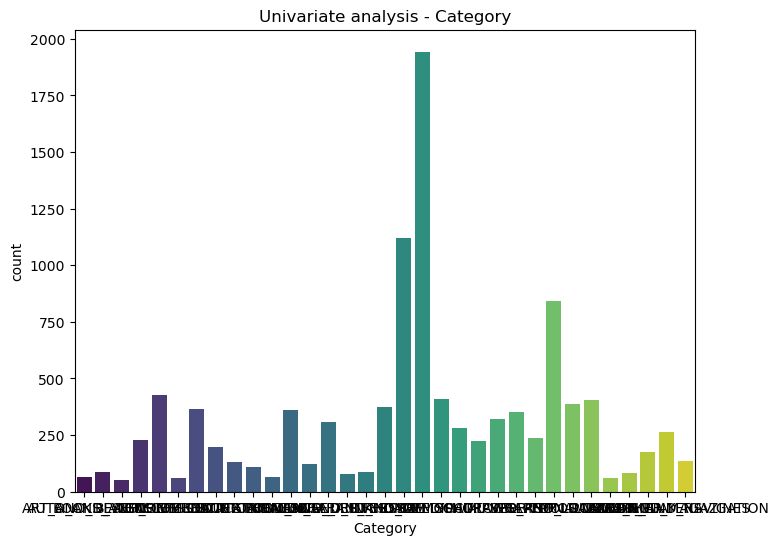

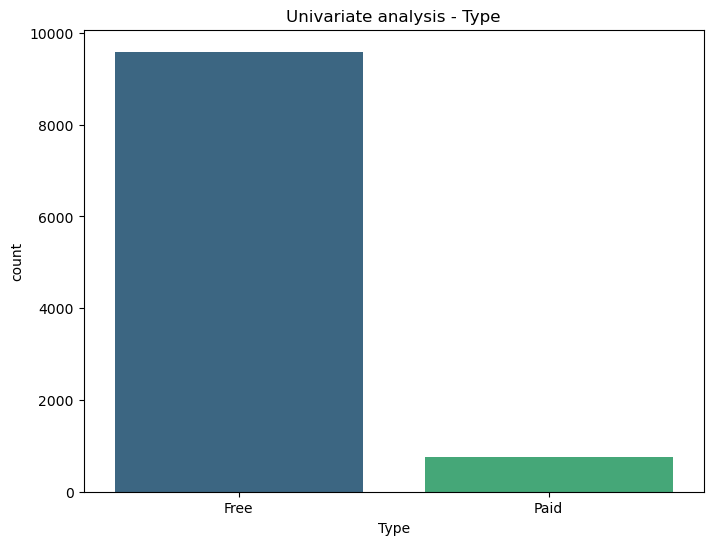

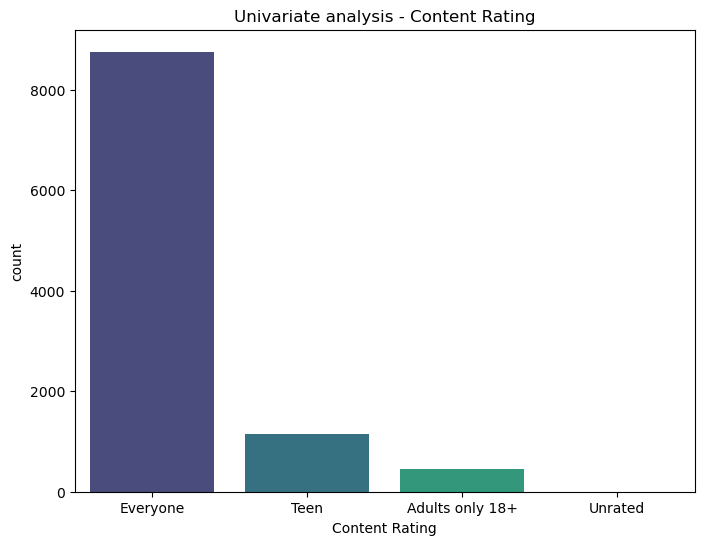

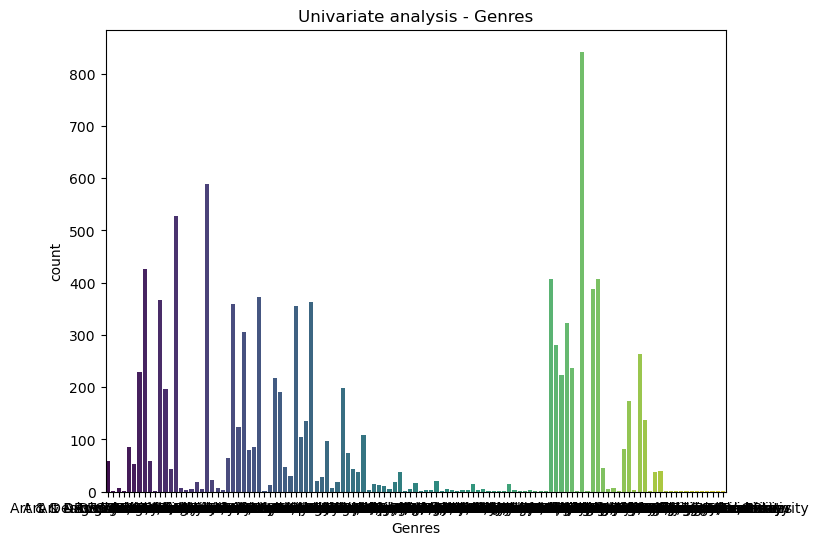

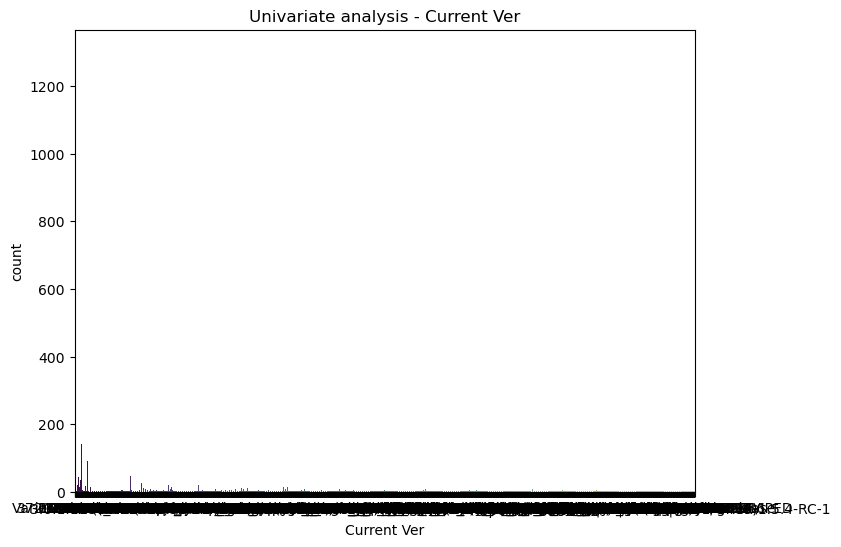

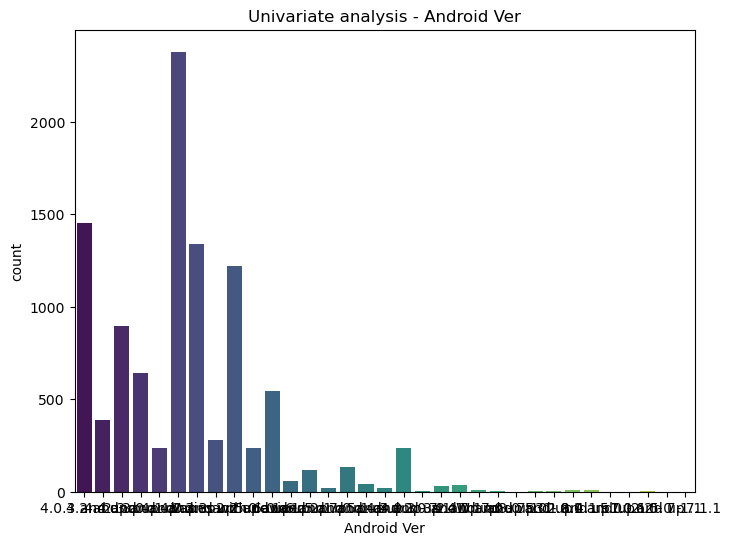

In [84]:
for i in cat_col :
    plt.figure(figsize=(8,6))
    sns.countplot(x=i,data=df,palette="viridis")
    plt.title(f"Univariate analysis - {i}")
    plt.show()

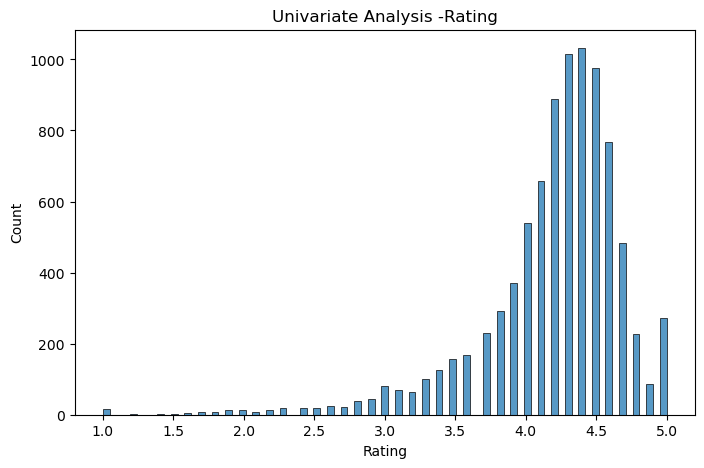

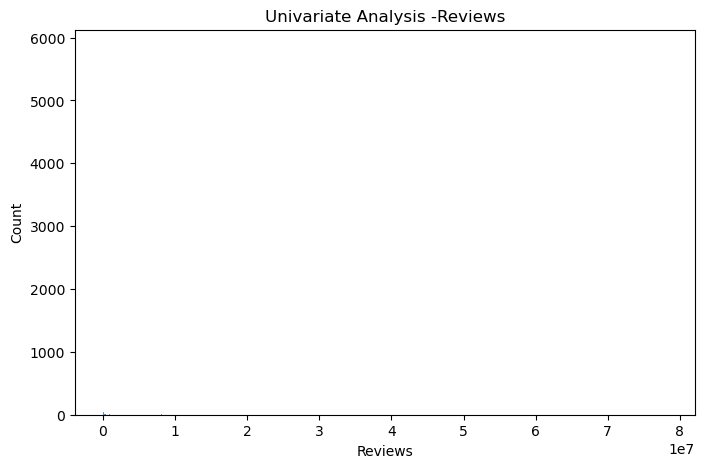

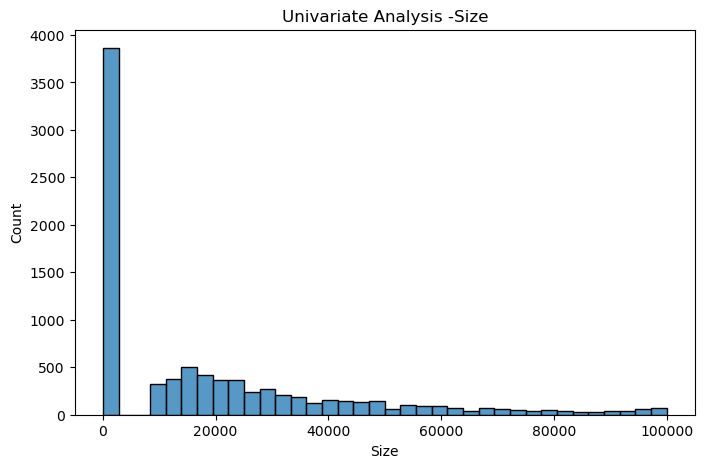

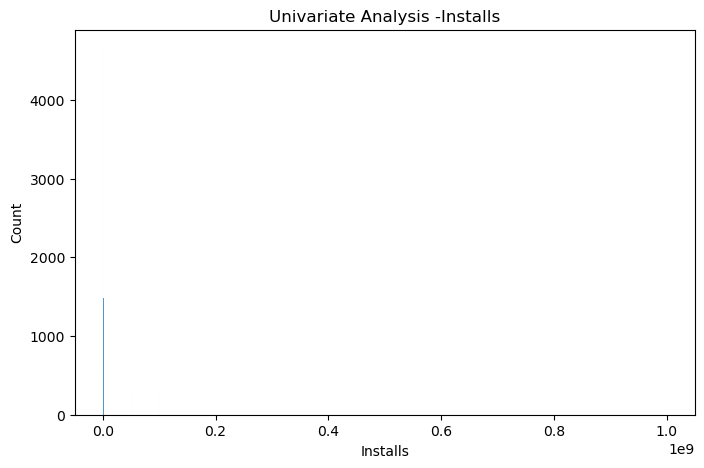

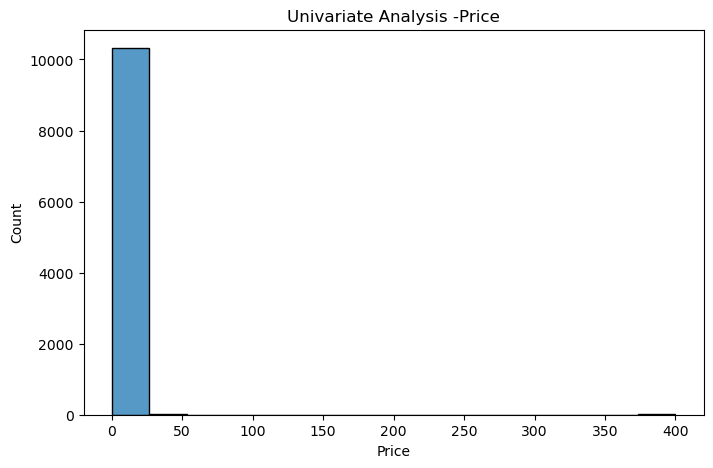

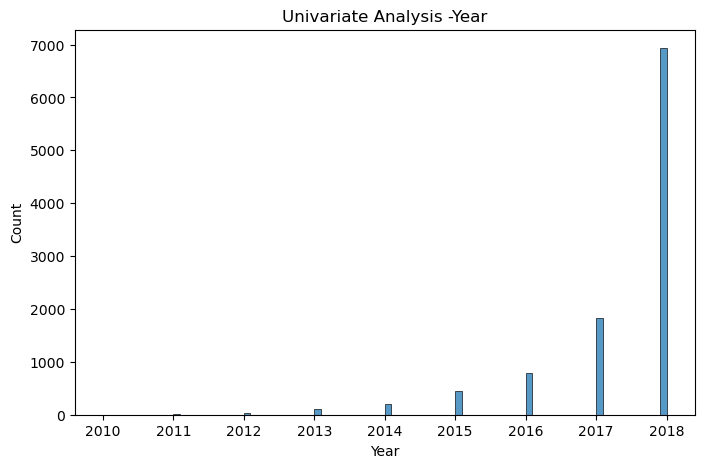

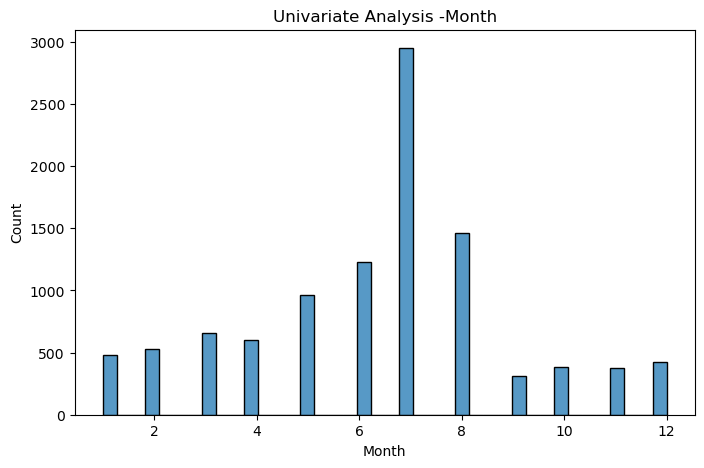

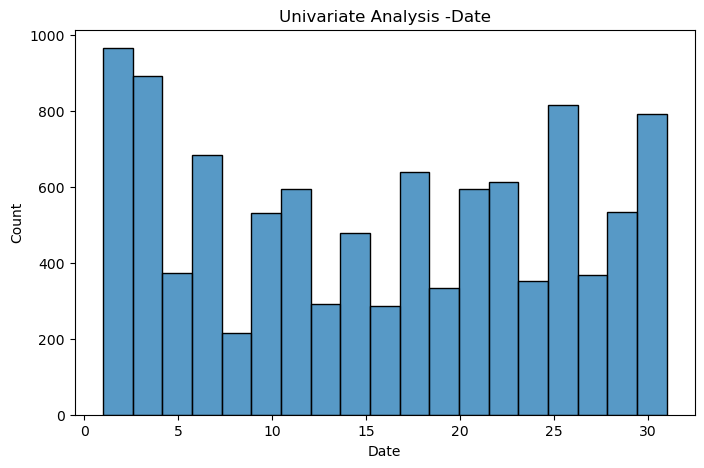

In [85]:
def Univariate_Analysis(col):
    for i in col :
        plt.figure(figsize=(8,5))
        sns.histplot(x=i ,data=df,palette="coolwarm")
        plt.title(f"Univariate Analysis -{i}")
        plt.show()
        
Univariate_Analysis(num_col)

In [86]:
## Find the unique Value of each columns

In [89]:
def Unique_Value(col):
    for i in df.columns :
        x =df[i].unique()
        print(f"{i} unique values are ==>{x}")
        print("====================================================================")

In [90]:
Unique_Value(df)

App unique values are ==>['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category unique values are ==>['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Rating unique values are ==>[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6
 2.1 1.4 1.5 1.2]
Reviews unique values are ==>[   159    967  8751

In [80]:
df.to_csv("Google_Play_store_clean")